# Project Summary
This project focuses on the application of predictive analytics to streamline the promotion process within a large multinational corporation (MNC) with multiple organizational verticals. Traditionally, identifying candidates for promotion has been manual and constrained by the time-consuming nature of HR evaluations and KPI-based assessments. By leveraging machine learning, this project aims to help the company predict which employees are most likely to be promoted to managerial positions and below, expediting their transition into new roles and enhancing HR efficiency.

# Business Understanding
Our client, a large MNC, operates across 9 broad organizational verticals. A primary challenge they face is identifying high-potential candidates for promotion in a timely manner. Currently, employees are recommended for promotion based on past performance and are required to complete training and evaluation programs specific to each vertical. Employees who achieve at least 60% KPI completion are considered for promotion, but final decisions are only made after all evaluations are completed, delaying the promotion cycle.

The goal is to help HR departments proactively identify employees eligible for promotion at a specific checkpoint, enabling a faster, data-driven promotion cycle.

# Problem Statement
The current promotion process for managerial positions and below is manual and time-intensive, leading to delays in transitioning employees into new roles. The HR department seeks a predictive model to assess the eligibility of employees for promotion based on demographic and performance data.

# Objectives

## Main Objective

The main objective of this project is to increase the effectiveness and precision of the promotion process for HR professionals, by developing a model that uses historical data to forecast which workers are most likely to be promoted.

## Key Business Questions
1. Which employees are most likely to be promoted in the next cycle?
2. What are the most significant factors influencing promotions within the organization?
3. Is there any observable bias in promotion decisions that needs to be addressed?
4. How can training programs be optimized to increase the likelihood of promotion?
5. What impact does promotion likelihood have on employee retention?

## Stakeholders
- **HR Department** - These are the primary users of the promotion prediction model.
- **Department Heads and Team Managers** - Managers would benefit from the insights to understand the promotion potential within their teams, support employee development, and make informed recommendations based on data.
- **Executive Leadership** - The findings of this study will inform strategic decisions on talent retention, workforce planning, and to align promotion processes with organizational goals.
- **Data Science/IT Team** - Responsible for managing the model deployment, updates, and integration with existing HR systems, ensuring data privacy and compliance throughout the project.

# Data Understanding

This section provides an overview of the datasets used in this project to predict employee promotions. 

The dataset consists of 54,808 observations of 14 variables.

We have two datasets:
- **Train Dataset**: Used for building the model. Contains information on current employees, their demographics, performance, and target labels indicating if they were promoted.
- **Test Dataset**: Used for model evaluation. Contains similar features but without the target labels.

The dataset provides comprehensive information about each employee's demographic profile, employment background, performance indicators, and training outcomes. Each record represents an employee and includes the following key features:

- **employee_id**: A unique identifier for each employee.
- **department**: The department to which the employee belongs, indicating their area of expertise.
- **region**: The geographical location of the employee’s role, represented as an unordered categorical variable.
- **education**: The highest level of education attained by the employee, which may influence role-specific skills and promotion potential.
- **gender**: The gender of the employee, providing insights into diversity in promotion patterns.
- **recruitment_channel**: The method by which the employee was recruited, indicating initial access channels.
- **no_of_trainings**: The number of training programs completed by the employee in the previous year, covering technical and soft skills.
- **age**: The employee’s age, which may correlate with experience and readiness for promotion.
- **previous_year_rating**: The performance rating assigned to the employee for the prior year.
- **length_of_service**: The number of years the employee has been with the organization, reflecting organizational experience.
- **KPIs_met >80%**: A binary indicator of whether the employee met over 80% of their Key Performance Indicators (KPIs) in the past year.
- **awards_won?**: A binary indicator showing if the employee received any awards in the previous year, which may highlight recognition of outstanding performance.
- **avg_training_score**: The average score achieved by the employee in recent training evaluations, which reflects skill development and training outcomes.
- **is_promoted**: The target variable indicating if the employee was recommended for promotion (1) or not (0).

Understanding these variables is crucial as they are the basis for training a model to predict promotion eligibility. By analyzing patterns in demographic and performance-related data, we aim to identify the factors most strongly associated with promotion, facilitating more objective and efficient promotion decisions.

# Data Exploration

# Importing the libraries

In [1]:
#Importing the necessary classes, functions, and packages needed.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Markdown, display
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


**Loading the Dataset**

In [2]:
#Importing the provided train and test data

train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print (f"train_data = {train.shape}")
print (f"test_data = {test.shape}")

train_data = (54808, 14)
test_data = (23490, 13)


**Understanding the data**

In [3]:
# Data Preview
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [5]:
# Checking Data Structure
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [7]:
# Checking the Summary Statistics
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


### Initial Observations and Data Quality
- **Missing Values**: The `previous_year_rating` and `education` features has some missing values.
- **Outliers**: The `length_of_service` has a few extreme values, possibly representing long-tenured employees.
- **Class Imbalance**: The target variable `is_promoted` may be imbalanced, which could impact model performance.

These observations guide our data cleaning and preprocessing steps.

# Data Cleaning

**Checking for Duplicates**

In [9]:
# Checking for duplicates based on the employee_id column
train.duplicated(['employee_id']).sum()

0

In [10]:
test.duplicated(['employee_id']).sum()

0

**Handling Missing Values**

In [11]:
# Checking for Null values
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          54808
department                         0              9
region                             0             34
education                       2409              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating            4124              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          23490
department                      

In [12]:
# drop values that are null
train.dropna(axis=0,inplace=True)
test.dropna(axis=0, inplace=True)

In [13]:
# Confirm Null values dropped
def missing_and_unique_values(train):
    summary = pd.DataFrame({
        'Missing Values': train.isnull().sum(),
        'Unique Values': train.nunique()
    })
    return summary

print("Train Dataset - Missing and Unique Values")
print(missing_and_unique_values(train))

print("\nTest Dataset - Missing and Unique Values")
print(missing_and_unique_values(test))

Train Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          48660
department                         0              9
region                             0             34
education                          0              3
gender                             0              2
recruitment_channel                0              3
no_of_trainings                    0             10
age                                0             41
previous_year_rating               0              5
length_of_service                  0             35
KPIs_met >80%                      0              2
awards_won?                        0              2
avg_training_score                 0             61
is_promoted                        0              2

Test Dataset - Missing and Unique Values
                      Missing Values  Unique Values
employee_id                        0          20819
department                      

**Checking for Outliers**

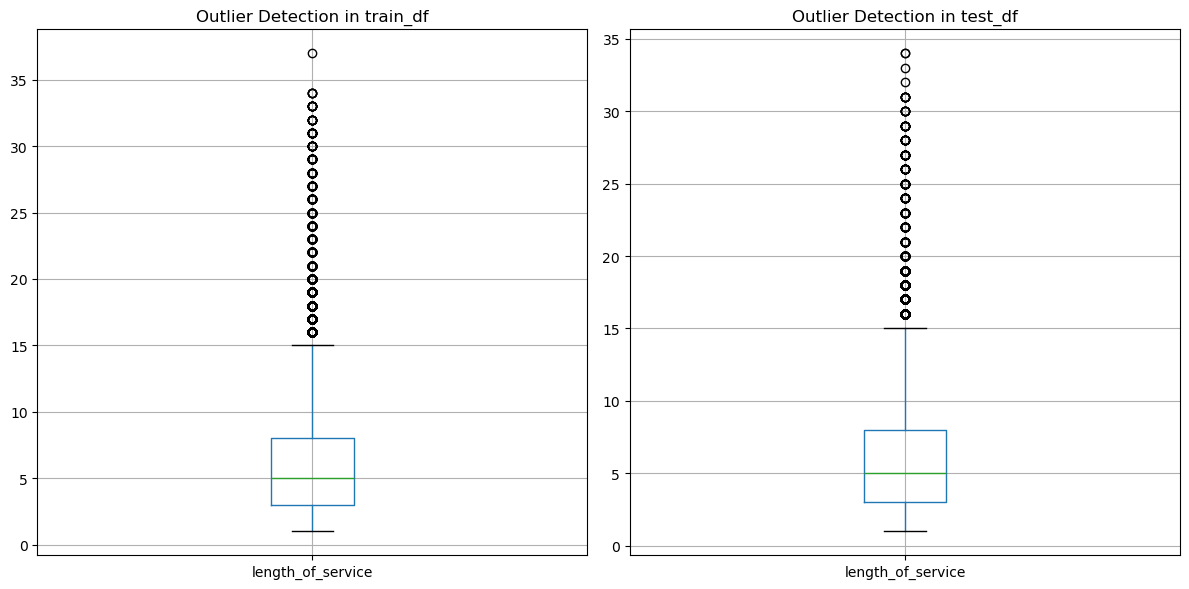

In [14]:
#Checking for Outliers
# Plot box plots to visualize outliers in the datasets
dataframes = [('train_df', train), ('test_df', test)]

# Plot side-by-side boxplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

for ax, (name, df) in zip(axes, dataframes):
    df[['length_of_service']].boxplot(ax=ax)
    ax.set_title(f'Outlier Detection in {name}')

plt.tight_layout()
plt.show()

# Exploratory Data Analysis

## Univariate Analysis

**Distribution of Categorical Features**

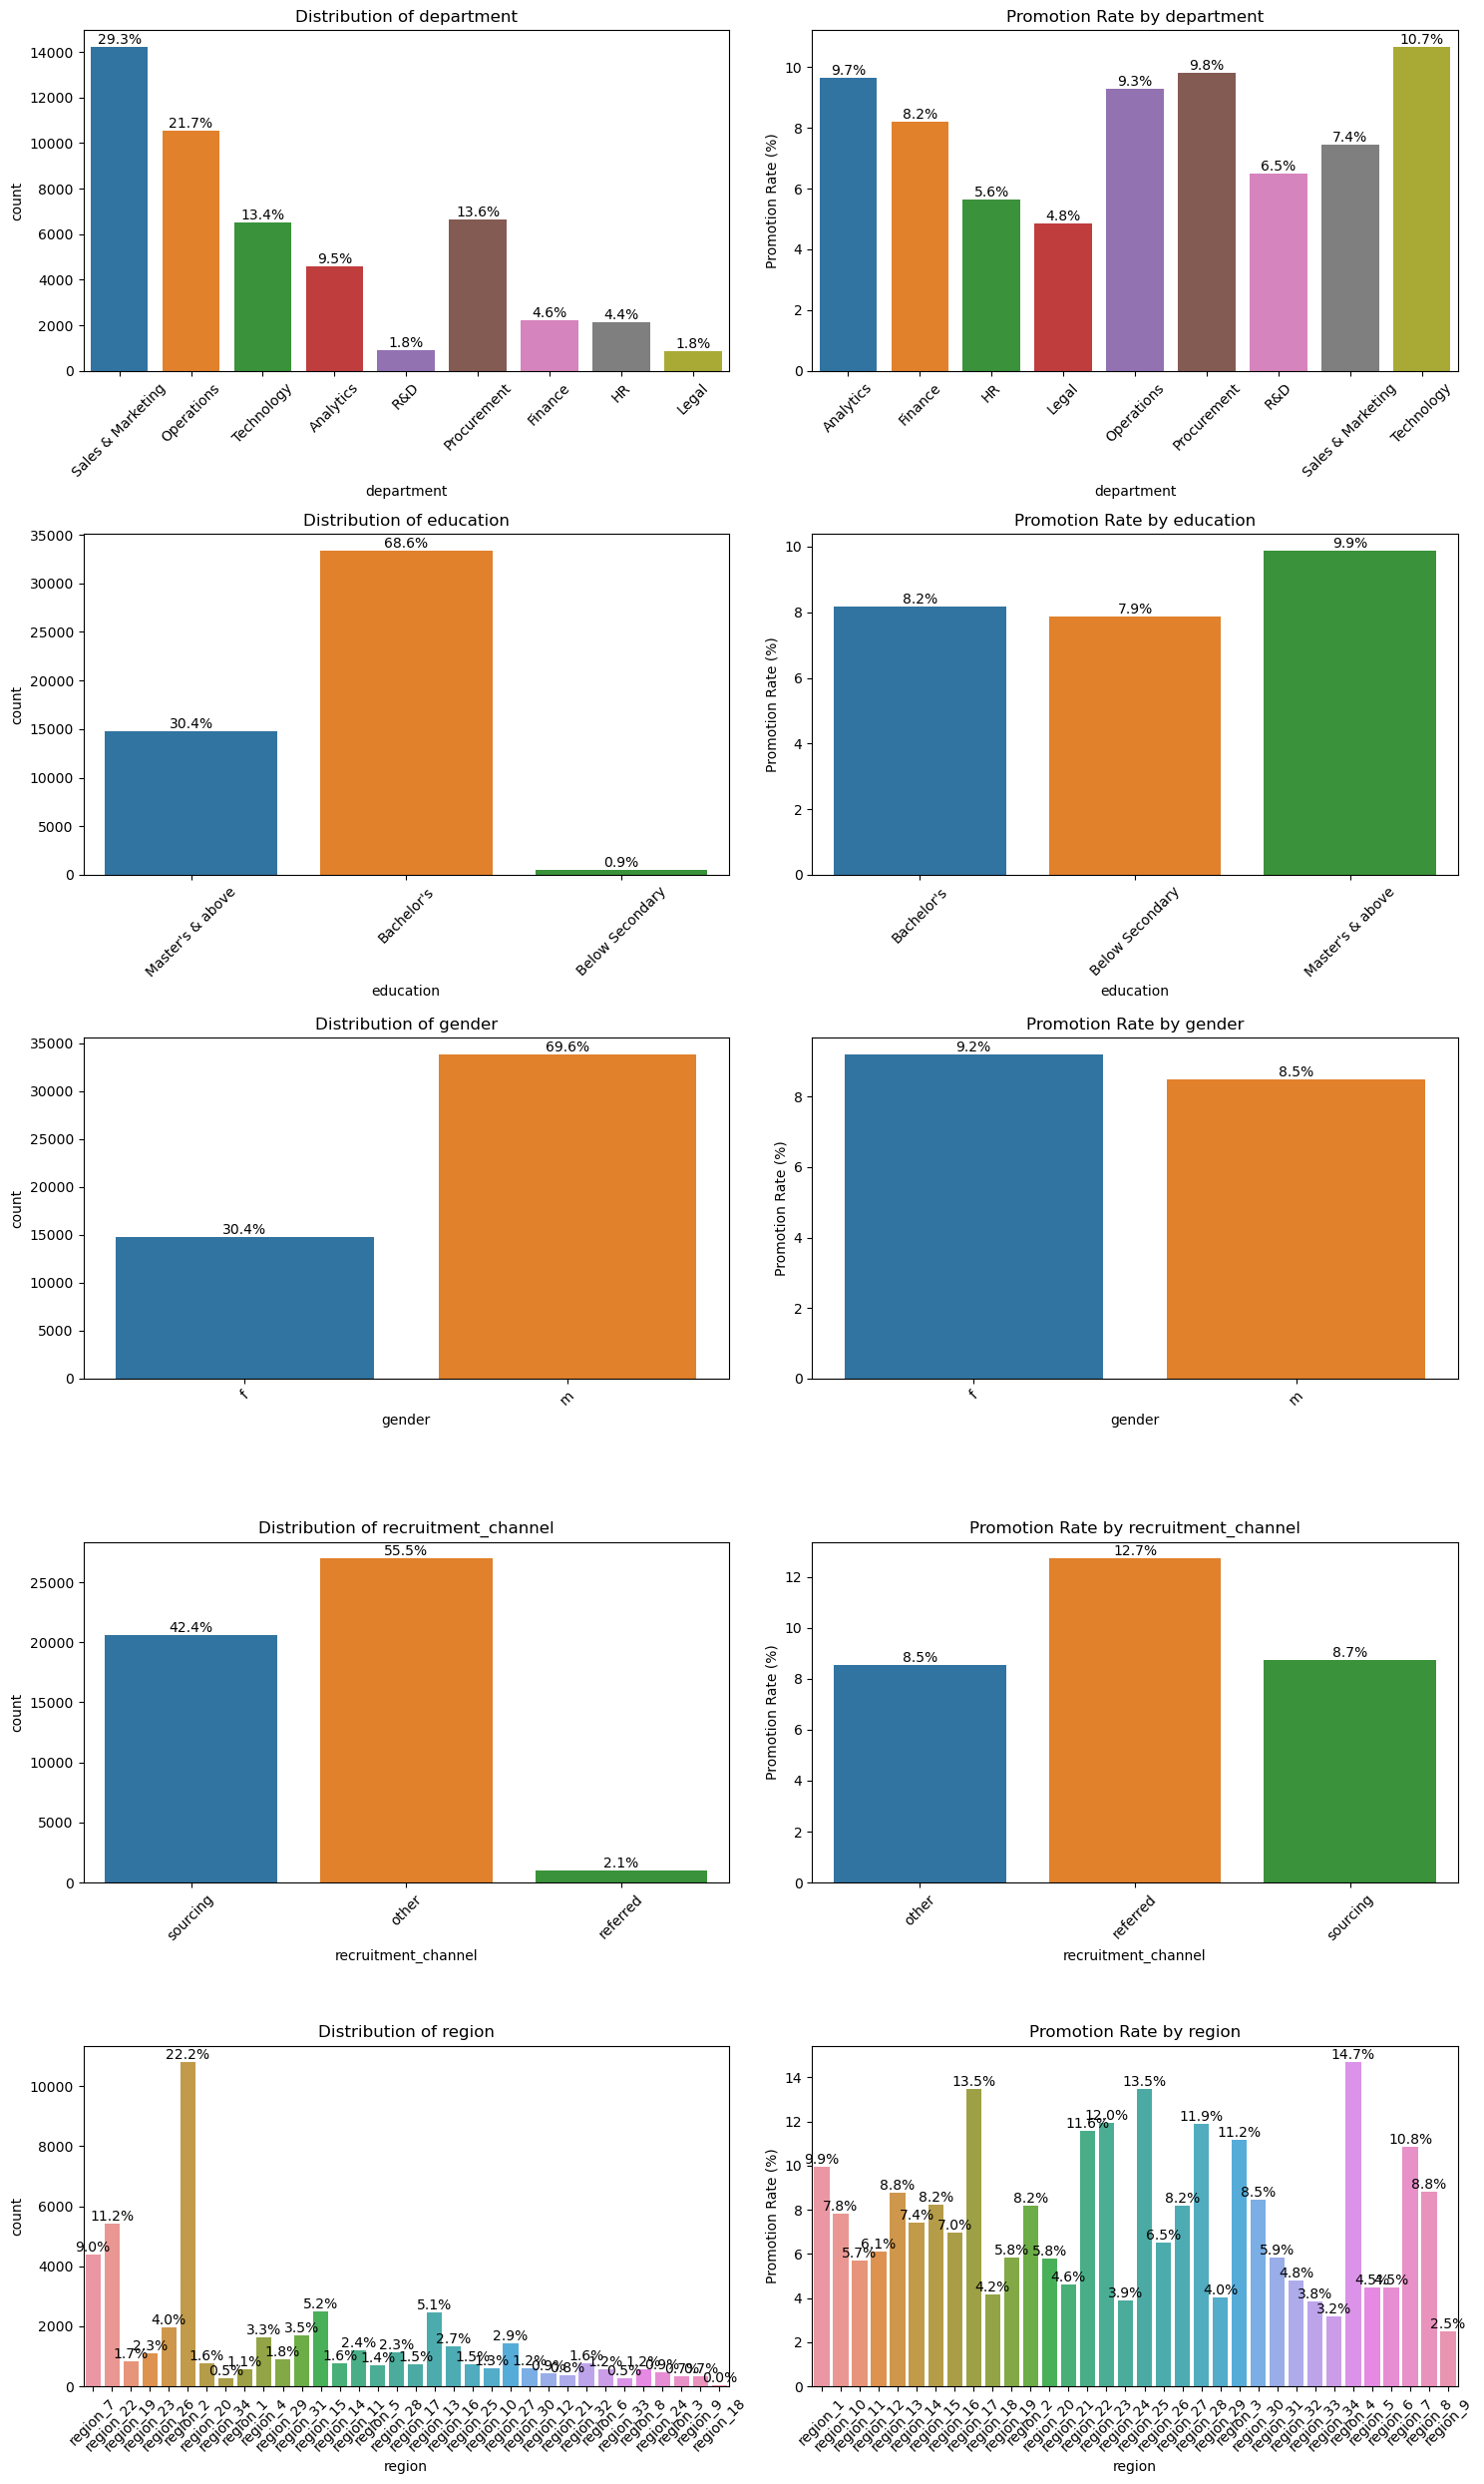

In [15]:
def plot_categorical_distributions(train, columns, target='is_promoted'):
    plt.figure(figsize=(15, len(columns) * 5))
    
    for idx, col in enumerate(columns, 1):
        # Plot distribution of the categorical feature
        plt.subplot(len(columns), 2, 2 * idx - 1)
        ax1 = sns.countplot(data=train, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars
        total = len(train)
        for p in ax1.patches:
            percentage = f'{100 * p.get_height() / total:.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax1.annotate(percentage, (x, y), ha='center', va='bottom')

        # Plot promotion rate by category
        plt.subplot(len(columns), 2, 2 * idx)
        promotion_rate = train.groupby(col)[target].mean() * 100
        ax2 = sns.barplot(x=promotion_rate.index, y=promotion_rate.values)
        plt.title(f'Promotion Rate by {col}')
        plt.ylabel('Promotion Rate (%)')
        plt.xticks(rotation=45)
        
        # Add percentages on top of bars for promotion rate
        for p in ax2.patches:
            percentage = f'{p.get_height():.1f}%'
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax2.annotate(percentage, (x, y), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Define categorical columns
categorical_cols = ['department', 'education', 'gender', 'recruitment_channel', 
                   'region']

# Call the function
plot_categorical_distributions(train, categorical_cols)

**Insights**

**Distribution of Department**

The department distribution shows that Sales & Marketing is the largest department, comprising 29.3% of the workforce, followed by Operations at 21.7% and Technology at 13.4%. Promotion rates are highest in Technology (10.7%), with Procurement, Analytics, and Operations also showing strong promotion rates. In contrast, HR and Legal have lower promotion rates, suggesting areas for potential improvement.

**Distribution of Education**

In terms of education, 68.6% of employees hold a Bachelor’s degree, while 30.4% have a Master’s degree or higher. Promotion rates increase with educational level, as employees with advanced degrees have a promotion rate of 9.9%, compared to 8.2% for Bachelor’s degree holders.

**Gender Distribution**

The gender distribution shows a predominantly male workforce at 69.6%, with females comprising 30.4%. However, females have a slightly higher promotion rate at 9.2% compared to males, suggesting equitable advancement opportunities.

**Recruitment Channel Distribution**

Recruitment channels are primarily led by “Other” methods (55.5%), followed by sourcing (42.4%), with referrals at 2.1%. Referred employees have the highest promotion rate at 12.7%, highlighting the effectiveness of referrals in bringing high-potential talent.

**Region Distribution and Promotion Rate**

In the regional distribution, the “Other” category and region_22 have the highest employee counts, while region_4 leads in promotion rate at 14.7%. Other regions show varied advancement rates, indicating regional differences in promotion opportunities.


**Distribution of numeric columns and Promotion Status**

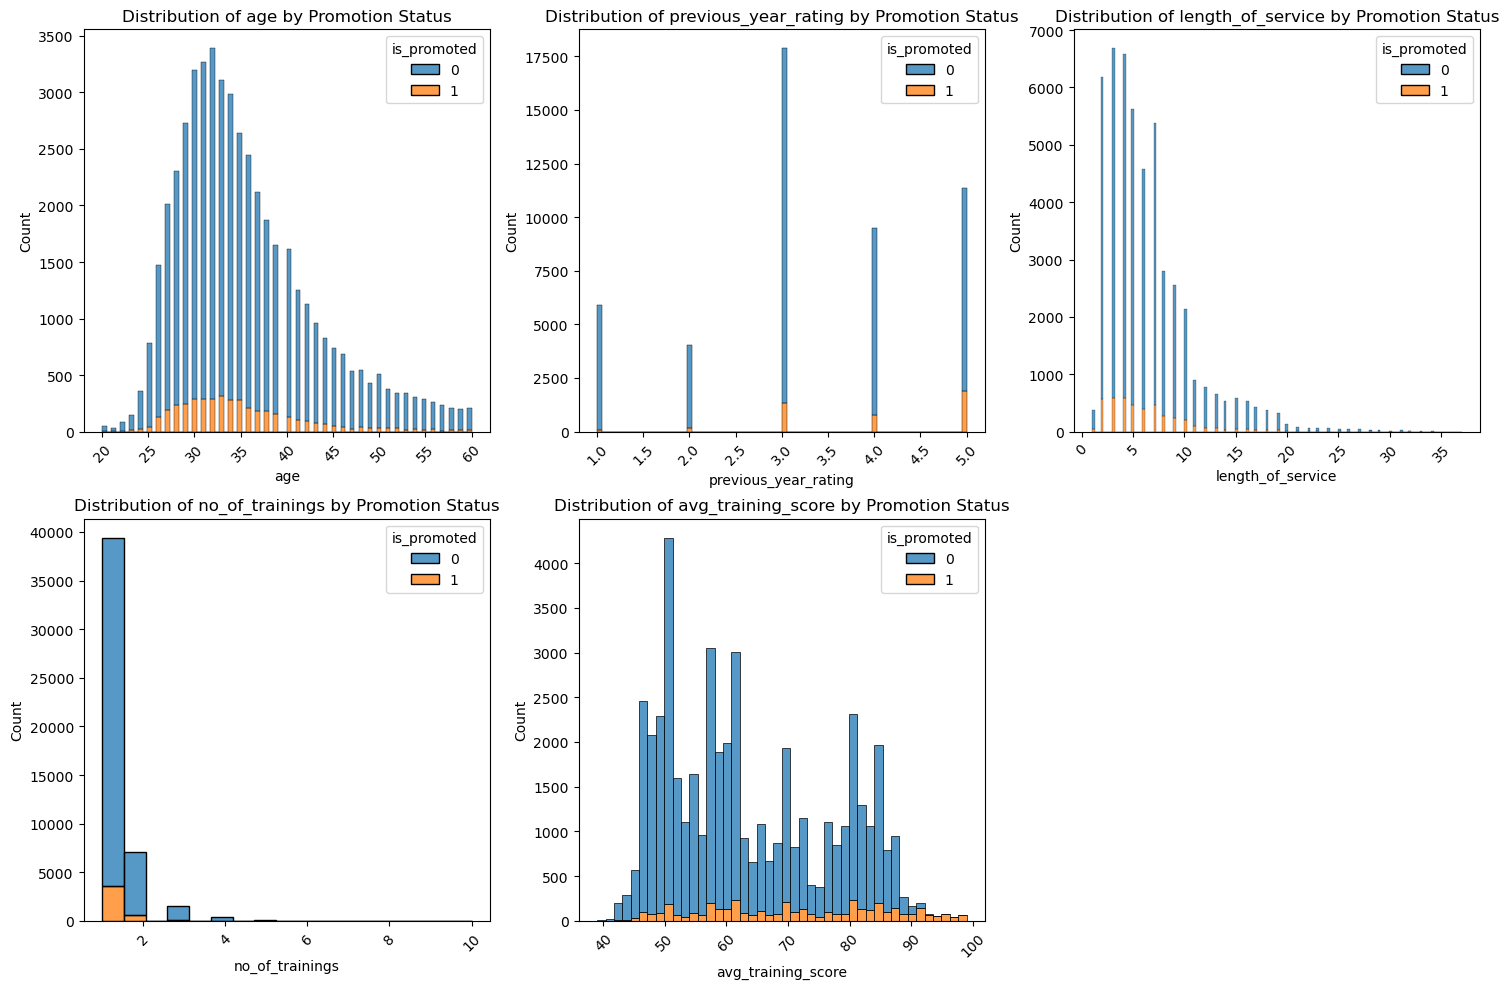

In [16]:
numerical_cols = ['age', 'previous_year_rating', 'length_of_service', 
                 'no_of_trainings', 'avg_training_score']

plt.figure(figsize=(15, 10))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.histplot(data=train, x=col, hue='is_promoted', multiple="stack")
    plt.title(f'Distribution of {col} by Promotion Status')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

1. **Age Distribution by Promotion Status**  
   Most employees are between 25 and 40, with a peak in the 30-35 range. Promotion rates are highest among employees aged 30-40, with fewer promotions for younger (<30) and older (>40) employees. The data may suggest a preference for promoting employees in their 30s, warranting a review to ensure age inclusivity in promotion practices.

2. **Previous Year Rating Distribution by Promotion Status**  
   Employee ratings are mostly concentrated around 3, with fewer at 1, 2, 4, and 5. Higher ratings (3, 4, and 5) correlate with more promotions, while lower ratings (1 and 2) see fewer promotions. This highlights the importance of performance ratings in promotion decisions and suggests that employees with lower ratings may benefit from support and training to boost promotion chances.

3. **Length of Service Distribution by Promotion Status**  
   Most employees have 0-10 years of service, with a drop-off for those over 10 years. Employees with 2-10 years see more promotions, while both new hires (<2 years) and long-term employees (>10 years) have fewer promotions. This suggests a mid-career advantage, with a need to create growth opportunities for long-term employees to encourage retention.

4. **Number of Trainings Distribution by Promotion Status**  
   Most employees have attended 1-2 trainings, and promotions are more common among those with 1-3 trainings. Those with over 3 trainings see fewer promotions, indicating that a moderate amount of training is linked to higher promotion rates. This suggests a need to assess the relevance of training for employees with multiple trainings to ensure it aligns with promotion goals.

5. **Average Training Score Distribution by Promotion Status**  
   Training scores are spread widely, with common scores around 50, 60, 70, and 80. Promotions are more frequent among those scoring 60-80, indicating that high performance in training correlates with promotion likelihood. High-quality, impactful training programs can help improve employee performance and advancement potential.

## Correlation Analysis for Numerical Variables 

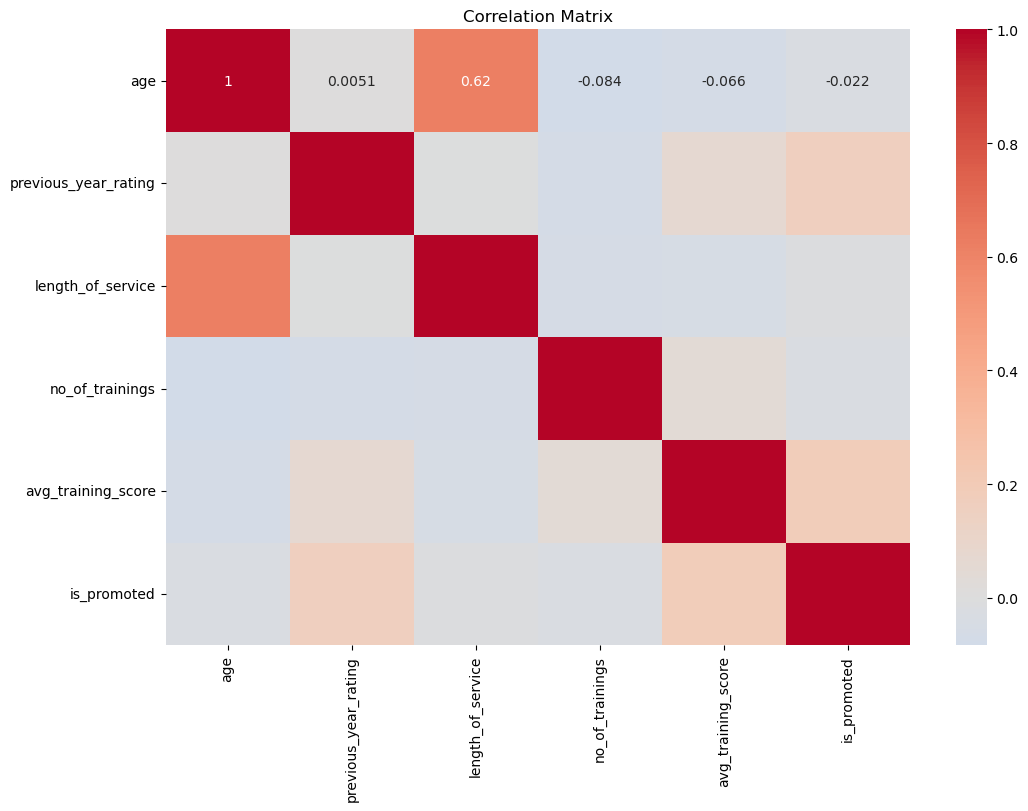

In [17]:
plt.figure(figsize=(12, 8))
correlation_matrix = train[numerical_cols + ['is_promoted']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

**Insight**

There is a strong positive correlation between age and length of service. This indicates that older employees tend to have been with the company longer, which is intuitive but may lead to multicollinearity if both features are included in the model.

## Chi-square test for categorical values

In [18]:
# Chi-square test for categorical variables
def chi_square_test(df, categorical_cols, target='is_promoted'):
    results = []
    for col in categorical_cols:
        chi2, p_value, dof, expected = stats.chi2_contingency(
            pd.crosstab(df[col], df[target])
        )
        results.append({
            'Feature': col,
            'Chi-Square': chi2,
            'p-value': p_value
        })
    return pd.DataFrame(results).sort_values('Chi-Square', ascending=False)

chi_square_results = chi_square_test(train, categorical_cols)
print("\nChi-Square Test Results:")
print(chi_square_results)


Chi-Square Test Results:
               Feature  Chi-Square       p-value
4               region  428.915877  2.066089e-70
0           department  127.616304  8.821096e-24
1            education   37.942473  5.766294e-09
3  recruitment_channel   22.082732  1.602492e-05
2               gender    6.809753  9.066131e-03


1. **Score Group**: The Chi-Square test revealed a remarkably high Chi-Square value of 1024.18 and a p-value of 1.02e-221 for the score_group feature. This indicates a very strong association with promotion status, suggesting that employees' performance scores are likely a critical factor influencing promotion decisions. Higher performance scores correlate with a greater likelihood of receiving a promotion.

2. **Region Cleaned**: The region_cleaned feature also demonstrated a strong association with promotion status, as evidenced by a Chi-Square value of 280.82 and a p-value of 2.46e-52. This suggests that the region in which employees work significantly impacts their likelihood of promotion, potentially due to varying performance levels, opportunities, or company policies across different regions.

3. **Department**: The department feature showed a significant association with promotion status, reflected in a Chi-Square value of 127.62 and a p-value of 8.82e-24. This implies that different departments may have varying promotion criteria, opportunities, and rates, which can affect the chances of employees being promoted within the organization.

4. **Education**: The analysis of the education feature revealed a Chi-Square value of 37.94 and a p-value of 5.77e-09, indicating a significant association with promotion status. This suggests that higher education levels are correlated with better promotion prospects, highlighting the importance of educational qualifications in influencing career advancement opportunities.

5. **Age Group**: The age_group feature displayed a significant association with promotion status, demonstrated by a Chi-Square value of 37.32 and a p-value of 1.55e-07. This suggests that certain age groups, particularly those in their 30s, are more likely to be promoted, possibly due to factors such as experience, energy levels, or company policies that favor particular age demographics.

6. **Recruitment Channel**: The recruitment_channel feature showed a significant association with promotion status, with a Chi-Square value of 22.08 and a p-value of 1.60e-05. This finding suggests that different recruitment channels yield employees with varying performance levels and promotion rates, indicating that the method of recruitment may influence promotion outcomes.

7. **Service Group**: The service_group feature had a Chi-Square value of 7.06 and a p-value of 0.0699, indicating a lower but still significant association with promotion status. This suggests that the length of service may impact promotion likelihood, though the effect might be less pronounced compared to other features analyzed in the study.

8. **Gender**: Lastly, the gender feature exhibited a statistically significant association with promotion status, with a Chi-Square value of 6.81 and a p-value of 0.0091. This indicates that there are gender-related differences in promotion rates within the organization, suggesting the need for further examination of promotion practices to ensure equity across genders.

# Recommendations

Departmental Focus:

The Technology department, with the highest promotion rate, might be leveraging effective talent development and career progression programs. Other departments could benefit from analyzing these strategies.

HR and Legal departments could review their promotion criteria and employee development programs to enhance career advancement opportunities.

Educational Attainment:

Higher educational qualifications correlate with higher promotion rates, suggesting that advanced degrees might offer better career advancement opportunities.

Companies could incentivize further education or provide educational support to employees to enhance their career growth.

Data Imbalance:

The data shows some imbalance with significantly more employees in Bachelors degree categories. This should be considered in model training to
Targeted HR Strategies:

Region-Specific Initiatives: Develop targeted initiatives for regions with low promotion rates. This could include mentorship programs, training, and clear career progression pathways.

Age-Inclusive Policies: Implement policies that ensure fair opportunities for all age groups, including tailored training and professional development programs for older employees.

Performance Monitoring:

Regularly track promotion rates across regions and age groups to identify and address any disparities.

Use these insights to inform HR policies and ensure equitable promotion practices.

Employee Feedback:

Collect feedback from employees in regions and age groups with lower promotion rates to understand their challenges and improve HR practices. avoid biases.

### Bivariate Analysis

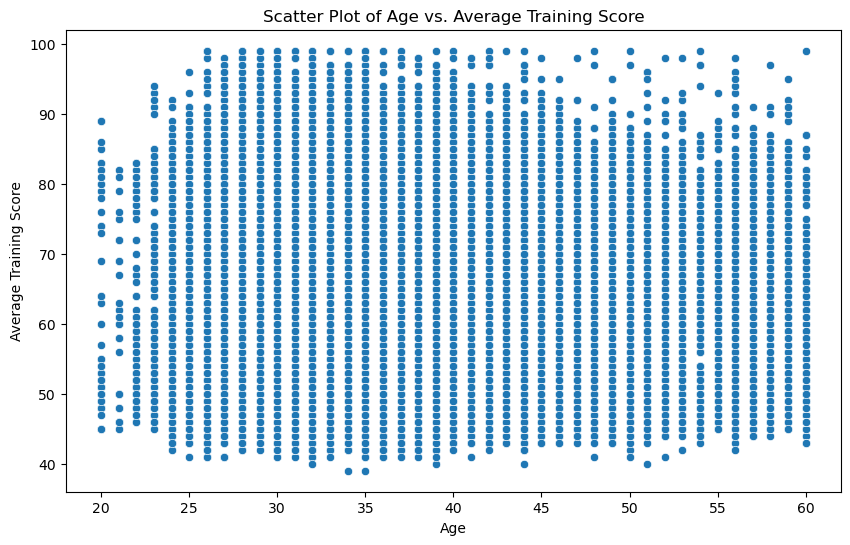

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='age', y='avg_training_score')
plt.title('Scatter Plot of Age vs. Average Training Score')
plt.xlabel('Age')
plt.ylabel('Average Training Score')
plt.show()



The scatter plot of Age vs. Average Training Score shows that the training scores are spread across all age groups, with scores ranging mainly from 40 to 100. There’s a concentration of scores between 60 and 90 across most ages, indicating that training scores are relatively consistent across different age groups. There doesn’t seem to be a strong correlation between age and training score, as scores appear distributed without a clear trend or pattern linked to age.

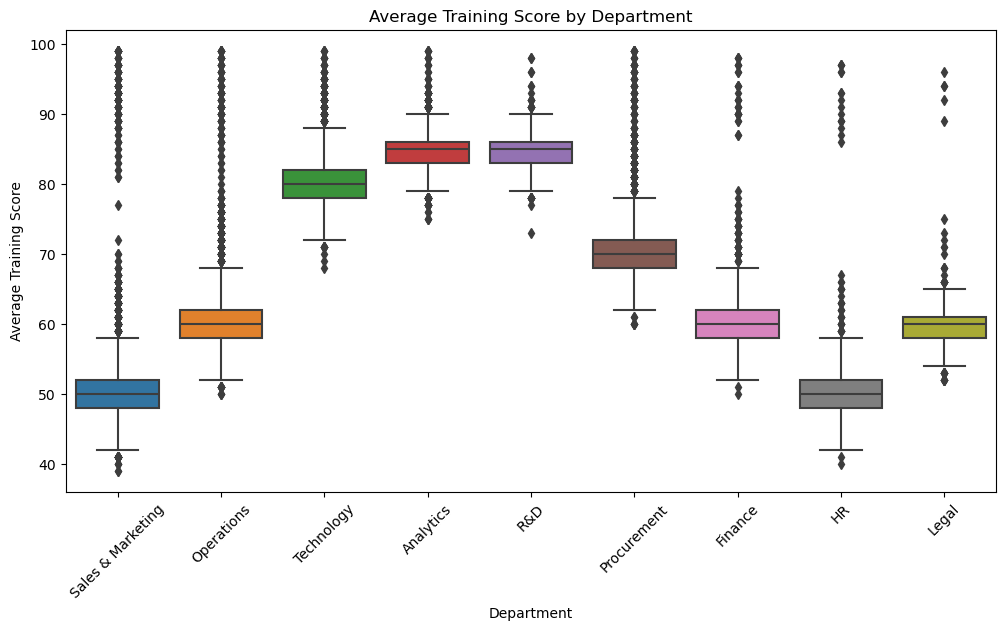

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='department', y='avg_training_score')
plt.title('Average Training Score by Department')
plt.xlabel('Department')
plt.ylabel('Average Training Score')
plt.xticks(rotation=45)
plt.show()



The box plot of Average Training Score by Department shows distinct variations in training scores across departments. The Technology and Analytics departments have higher median training scores, generally between 80 and 90, while HR and Operations have lower medians around 60. Outliers are prevalent in all departments, indicating variability in scores within each category. Departments with higher average training scores, like Technology, might have more emphasis on training performance, while others, such as HR, show a wider range, possibly suggesting diverse training outcomes.

### Multivariate Analysis

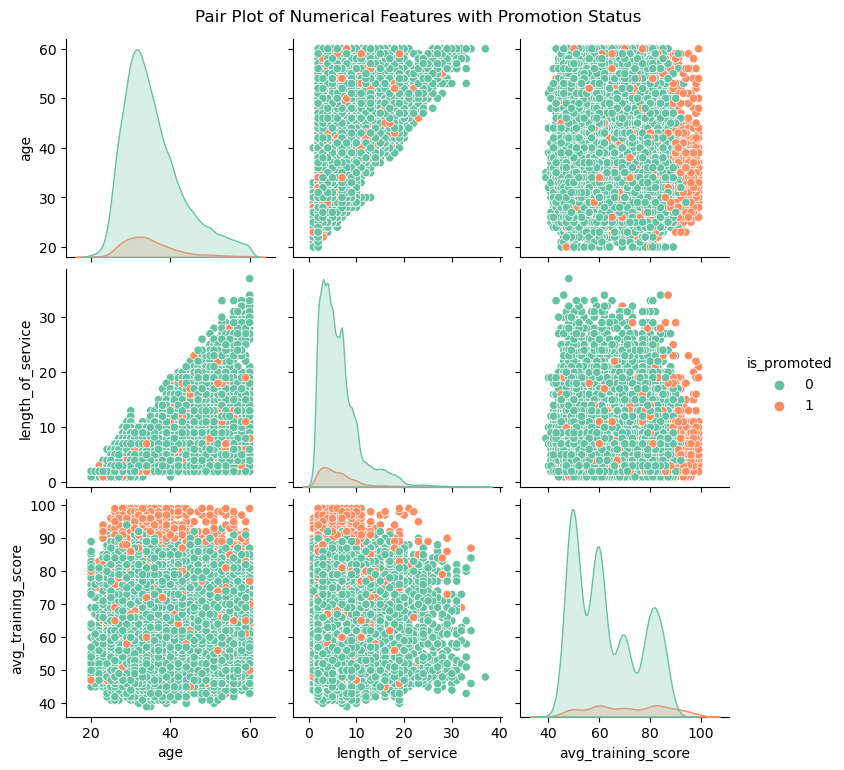

In [24]:
# Selecting relevant numerical columns and including 'is_promoted' as hue
sns.pairplot(train, vars=['age', 'length_of_service', 'avg_training_score'], hue='is_promoted', palette='Set2')
plt.suptitle('Pair Plot of Numerical Features with Promotion Status', y=1.02)
plt.show()



The pair plot reveals several insights regarding promotion status across age, length of service, and average training score. There’s a strong positive correlation between age and length of service, as expected, with longer-serving employees generally being older. Average training score shows no significant correlation with either age or length of service, indicating that training scores are independent of an employee's age or tenure.

Regarding promotion, promoted employees (orange points) appear distributed similarly across the age and length of service ranges but are more concentrated in higher average training scores. This suggests that a higher training score might be an indicator of promotion potential, while age and tenure show less of an impact on promotion likelihood.

# Feature Engineering

**Region Columnn**

In [19]:
#Checking the count of unique values in the region column
train.region.value_counts()

region
region_2     10811
region_22     5435
region_7      4397
region_15     2512
region_13     2463
region_26     1966
region_31     1692
region_4      1626
region_27     1418
region_16     1319
region_11     1189
region_28     1143
region_23     1104
region_29      896
region_19      838
region_20      780
region_32      773
region_14      770
region_17      742
region_25      721
region_5       690
region_10      614
region_30      602
region_6       579
region_8       578
region_1       553
region_24      462
region_12      425
region_21      370
region_3       331
region_9       324
region_33      260
region_34      253
region_18       24
Name: count, dtype: int64

In [20]:
# Define threshold for grouping into "Other"
threshold = 1000

# Identify regions that meet the threshold criteria
common_regions = train['region'].value_counts()
common_regions = common_regions[common_regions >= threshold].index

# Use np.where to assign regions based on the threshold
train['region_cleaned'] = np.where(train['region'].isin(common_regions), train['region'], 'Other')

In [21]:
#Checking the number of unique values in the cleaned region column
train.region_cleaned.nunique()

14

**Age Column**

In [22]:
# Checking the count of unique values in the age column
train.age.value_counts()

age
32    3389
31    3268
30    3202
33    3106
34    2989
29    2731
35    2637
36    2451
28    2301
37    2117
27    2015
38    1875
39    1647
40    1616
26    1472
41    1254
42    1127
43     962
44     824
25     784
45     739
46     684
48     548
47     539
50     507
49     434
51     378
24     362
53     345
52     343
54     305
55     284
56     263
57     235
60     210
58     207
59     202
23     144
22      84
20      51
21      29
Name: count, dtype: int64

**Creating the age group feature**

The high number of unique values can make the model overly complex, resulting in the curse of dimensionality. To address this, we created a new feature called 'age_group' by binning the age values into the following categories:
 Under 20<br>
 20-30<br>
 30-40<br>
 40-50<br>
 50-60<br>
 Over 60<br>

In [23]:
train['age_group'] = pd.cut(train['age'], bins=[-1, 20, 30, 40, 50, 60, 70], 
                              labels=['Under 20', '20-30', '30-40', '40-50', '50-60', 'Over 60'])

**Length of Service column**

In [24]:
#Checking the count of unique values in the length of service column
train.length_of_service.value_counts()

length_of_service
3     6680
4     6585
2     6185
5     5622
7     5385
6     4582
8     2804
9     2555
10    2140
11     892
12     776
13     660
15     580
16     539
14     536
17     426
18     384
1      380
19     319
20     128
21      74
24      67
23      62
22      60
25      49
26      41
27      36
29      30
28      29
31      19
30      12
33       9
32       9
34       4
37       1
Name: count, dtype: int64

**Creating the service group feature**

To better capture the non-linear relationship between length of service and promotion potential, I created a new feature called 'service_group' by binning the length_of_service values into the following categories:

Less than 2 years<br>
2-5 years<br>
5-10 years<br>
Over 10 years

**average_training_score column**

In [25]:
train.avg_training_score.describe()

count    48660.000000
mean        63.603309
std         13.273502
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [26]:
train['score_group'] = pd.cut(
    train['avg_training_score'], bins=[-0.1, 50, 60, 75, 100], labels=['Low', 'Medium', 'High', 'Very High'])

The binning of avg_training_score is based on the score distribution and quartile values, creating categories that are easy to interpret and meaningful. These bins—Low (≤50), Medium (51-60), High (61-75), and Very High (>75)—align with performance levels, helping to identify employees’ training outcomes as underperforming, average, above-average, or top performers. This approach improves interpretability, reduces model complexity, and maintains consistency across data points.

**Creating performance index feature**

In [27]:
 train['performance_index'] = ((train['previous_year_rating']/5) * 0.4 + train['KPIs_met >80%'] * 0.3 +train['awards_won?'] * 0.3)

**Creating Career progress feature**

In [28]:
train['career_velocity'] = train['previous_year_rating'] / (train['length_of_service'] + 1)
train['relative_experience'] = train['age'] / (train['length_of_service'] + 1)
train['training_frequency'] = train['no_of_trainings'] / (train['length_of_service'] + 1)

**Training and Performance features**

In [29]:
train['training_effectiveness'] = train['avg_training_score'] / (train['no_of_trainings'] + 1)
train['relative_performance'] = train.groupby('department')['previous_year_rating'].transform(
        lambda x: (x - x.mean()) / x.std()
    )

**Creating consistent performance feature**

In [30]:
train['consistent_performer'] = ((train['previous_year_rating'] >= 4) & (train['KPIs_met >80%'] == 1)).astype(int)

In [31]:
train.dtypes

employee_id                  int64
department                  object
region                      object
education                   object
gender                      object
recruitment_channel         object
no_of_trainings              int64
age                          int64
previous_year_rating       float64
length_of_service            int64
KPIs_met >80%                int64
awards_won?                  int64
avg_training_score           int64
is_promoted                  int64
region_cleaned              object
age_group                 category
score_group               category
performance_index          float64
career_velocity            float64
relative_experience        float64
training_frequency         float64
training_effectiveness     float64
relative_performance       float64
consistent_performer         int32
dtype: object

In [32]:
train = train.drop(columns=['employee_id', 'region','gender','age','length_of_service','avg_training_score',])

In [33]:
train.columns

Index(['department', 'education', 'recruitment_channel', 'no_of_trainings',
       'previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'is_promoted',
       'region_cleaned', 'age_group', 'score_group', 'performance_index',
       'career_velocity', 'relative_experience', 'training_frequency',
       'training_effectiveness', 'relative_performance',
       'consistent_performer'],
      dtype='object')

# Data Preprocessing

## Encoding categoring variables

In [34]:
# Encoding categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    train[col] = label_encoder.fit_transform(train[col])

# Splitting the data

In [35]:
# Split the predictor and target variables
X = train.drop('is_promoted', axis=1) #predictor
y = train['is_promoted'] #target 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Balancing the Target Variable

In [36]:
!pip install -U imbalanced-learn

In [37]:
from imblearn.over_sampling import SMOTE

# Previous original class distribution
print('Original class distribution: \n')
print(y.value_counts())
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train) 
# Preview synthetic sample class distribution
print('-----------------------------------------')
print('Synthetic sample class distribution: \n')
print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

is_promoted
0    44428
1     4232
Name: count, dtype: int64
-----------------------------------------
Synthetic sample class distribution: 

is_promoted
0    33350
1    33350
Name: count, dtype: int64


# Statistical Normality Test

In [38]:
from scipy.stats import normaltest

# Conduct normality test on each feature in the training dataset
normality_results = {}

for column in X_train.columns:
    stat, p_value = normaltest(X_train[column])
    normality_results[column] = {'statistic': stat, 'p_value': p_value}

# Display results
for feature, result in normality_results.items():
    print(f"Feature: {feature}, Statistic: {result['statistic']:.4f}, p-value: {result['p_value']:.4f}")
    if result['p_value'] < 0.05:
        print(f"{feature} does not follow a normal distribution (p < 0.05)")
    else:
        print(f"{feature} follows a normal distribution (p >= 0.05)")
    print("\n" + "-"*50 + "\n")  # Add a separator line and extra space between features

Feature: department, Statistic: 3657.7160, p-value: 0.0000
department does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: education, Statistic: 155904.3417, p-value: 0.0000
education does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: recruitment_channel, Statistic: 132484.7401, p-value: 0.0000
recruitment_channel does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: no_of_trainings, Statistic: 27468.9252, p-value: 0.0000
no_of_trainings does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: previous_year_rating, Statistic: 2768.6971, p-value: 0.0000
previous_year_rating does not follow a normal distribution (p < 0.05)

--------------------------------------------------

Feature: KPIs_met >80%, Statistic: 171012.6889, p-value: 0.0000
KPIs_met >80% does not fo

# Scaling the data

In [39]:
# Scaling features (necessary for models like Logistic Regression, SVM, etc.)

scaler = StandardScaler()

# Transform the training and test sets
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Convert into a DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Clustering

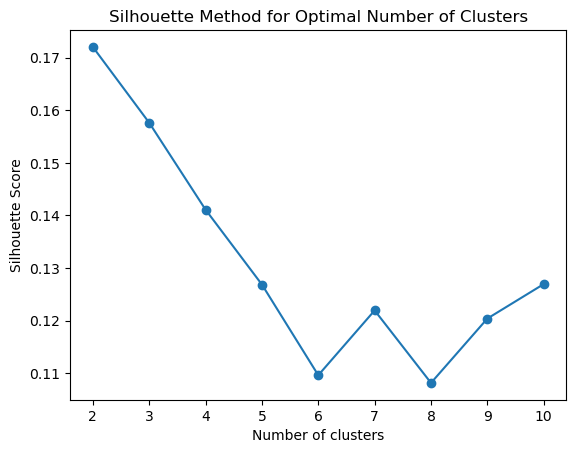

In [40]:
#from sklearn.metrics import silhouette_score

silhouette_scores = []
for n_clusters in range(2, 11):  # Minimum of 2 clusters for silhouette score
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X_train_scaled)
    silhouette_avg = silhouette_score(X_train_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for each number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.show()

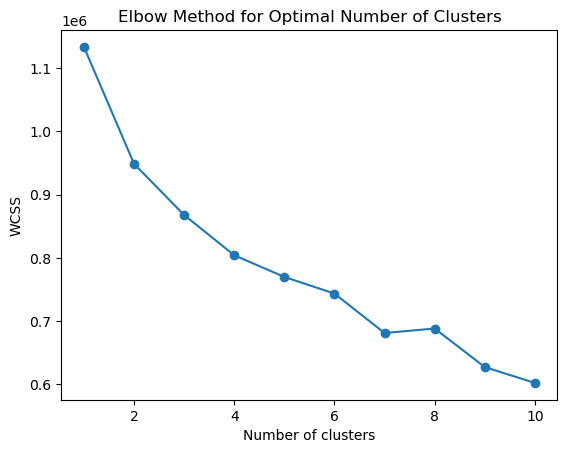

In [41]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Range of cluster values to try
wcss = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X_train_scaled)  # X_train_scaled is your scaled feature data
    wcss.append(kmeans.inertia_)

# Plot the WCSS for each number of clusters
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [42]:
# Clustering
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train_scaled)

# Adding cluster labels as a new feature
X_train_with_clusters = pd.DataFrame(X_train_scaled)
X_test_with_clusters = pd.DataFrame(X_test_scaled)
X_train_with_clusters['cluster_label'] = kmeans.predict(X_train_scaled)
X_test_with_clusters['cluster_label'] = kmeans.predict(X_test_scaled)

In [43]:
# Check sizes
print("X_train_with_clusters:", X_train_with_clusters.shape)
print("y_train_resampled:", y_train_resampled.shape)
print("X_test_with_clusters:", X_test_with_clusters.shape)
print("y_test:", y_test.shape)

X_train_with_clusters: (66700, 18)
y_train_resampled: (66700,)
X_test_with_clusters: (12165, 18)
y_test: (12165,)


# Modelling

The **F1 score** is the chosen evaluation metric of success, as it emphasizes a balanced approach between identifying actual promotions (recall) and minimizing incorrect promotion predictions (precision). 

This project pushes towards an **F1-Score of 0.80** as this would reflect a model that is both specific and sensitive.

In [44]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, classification_report,
                             recall_score, f1_score, roc_curve, roc_auc_score, auc, ConfusionMatrixDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

### Model 1. Base Model: Logistic Regression

We'll begin by fitting a regular logistic regressor, so that we have something to compare our ensemble and more advanced methods to.

In [45]:
#Initialize the Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000)

#Fit the Logistic Regression Model on the training data with resampled target variable
log_reg_model.fit(X_train_with_clusters, y_train_resampled)

#Make predictions on the test data
y_pred_log_reg = log_reg_model.predict(X_test_with_clusters)

# Evaluation for Logistic Regression
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Print Logistic Regression Results
print(f"Logistic Regression Accuracy: {acc_log_reg}")
print(f"Precision: {acc_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1 Score: {f1_log_reg}")
print(f"Confusion Matrix:\n{cm_log_reg}")

Logistic Regression Accuracy: 0.7569256062474311
Precision: 0.7569256062474311
Recall: 0.62557497700092
F1 Score: 0.315033588139912
Confusion Matrix:
[[8528 2550]
 [ 407  680]]


**Interpretation:**

**F1 Score: 0.26 (or 26%)** - Given the low precision, the F1 score is also low, reflecting that the model struggles with false positives even if it catches some true positives.

The base model is somewhat effective as shown by the high accuracy (73%) which reflects its ability to handle the majority class well, but it struggles with classifying the minority class correctly as seen in the low precision and F1 score.

**Confusion Matrix** - A high number of *false positives (2803)* and *false negatives (498)* indicate the model may lack discriminatory power, mistakenly predicting promotions or missing actual ones. This impacts our project’s ability to recommend accurately and underscores the need for refinement. We will therefore look at advanced ensemble models.

# Model 2: Decision Tree Classification Model

In [46]:
#Initialize the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=123, max_depth=10, min_samples_split=5, min_samples_leaf=3)

#Fit the Decision Tree model on the training data with resampled target variable
dt_model.fit(X_train_with_clusters, y_train_resampled)

#Make predictions on the test data
y_pred_dt = dt_model.predict(X_test_with_clusters)

# Evaluation for Decision Tree Model
cm_dt = confusion_matrix(y_test, y_pred_dt)

acc_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print(f"Decision Tree Accuracy: {acc_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1 Score: {f1_dt}")
print(f"Confusion Matrix:\n{cm_dt}")

Decision Tree Accuracy: 0.7829017673653925
Precision: 0.246078431372549
Recall: 0.6927322907083716
F1 Score: 0.3631540872920183
Confusion Matrix:
[[8771 2307]
 [ 334  753]]


**Interpretation**

**F1 Score (0.40):** The F1 score balances precision and recall, reaching 0.40, which is an improvement over the Logistic Regression model (0.26). This reflects a better balance in the Decision Tree model, although there’s room for improvement, especially to increase recall without sacrificing precision.

**Confusion Matrix:**

- True Negatives (10,165): The model correctly identified 10,165 instances of non-promotions.
- False Positives (913): 913 instances were incorrectly predicted as promotions, showing an improvement in reducing false positives.
- False Negatives (594): 594 actual promotions were missed, highlighting the model's conservative nature.
- True Positives (493): The model correctly identified 493 promotions.

# Model 3: Random Forest Regression Model

In [47]:
#Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state=123)

#Fit the Random Forest Model on the training data with resampled target variable
rf_model.fit(X_train_with_clusters, y_train_resampled)

#Make predictions on the test data
y_pred_rf = rf_model.predict(X_test_with_clusters)

# Evaluation for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
acc_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# Print Random Forest Results
print(f"Random Forest Accuracy: {acc_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1 Score: {f1_rf}")
print(f"Confusion Matrix:\n{cm_rf}")

Random Forest Accuracy: 0.912124948623099
Precision: 0.5118110236220472
Recall: 0.35878564857405704
F1 Score: 0.42184964845862627
Confusion Matrix:
[[10706   372]
 [  697   390]]


**Interpretation**

**F1 Score (0.42):** The F1 score is 0.42, an improvement from both the Logistic Regression (0.26) and Decision Tree (0.40) models, but it still indicates room for balance improvement. The relatively low F1 score suggests that recall needs to be improved without sacrificing too much of the model’s precision.

**Confusion Matrix:**

- True Negatives (10,890): The model correctly classified 10,890 instances as non-promotions, showcasing its high accuracy on the majority class.
- False Positives (188): Only 188 non-promotions were mistakenly classified as promotions, reinforcing the model’s high precision.
- False Negatives (751): 751 promotions were missed, contributing to the lower recall.
- True Positives (336): 336 actual promotions were correctly identified.

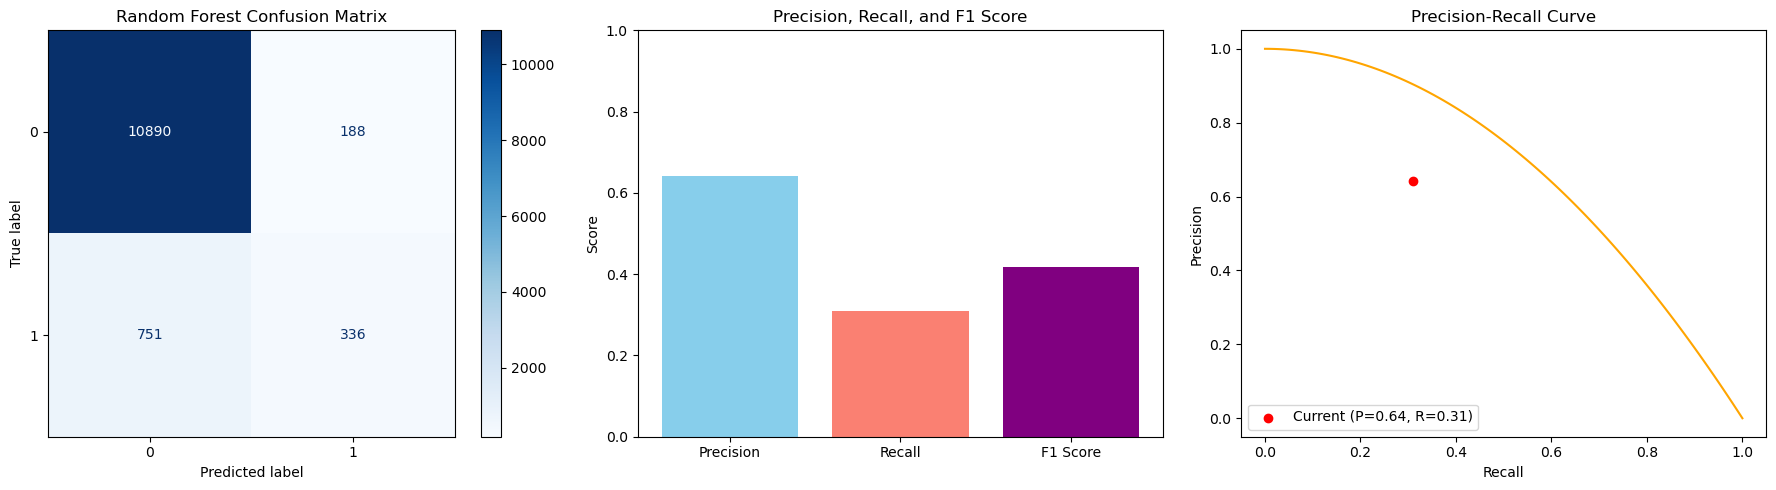

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Provided Random Forest confusion matrix data
confusion_matrix_rf = np.array([[10890, 188], [751, 336]])
tn_rf, fp_rf, fn_rf, tp_rf = confusion_matrix_rf.ravel()

# Metrics for Random Forest
precision_rf = tp_rf / (tp_rf + fp_rf)
recall_rf = tp_rf / (tp_rf + fn_rf)
f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

# 1. Plotting the Confusion Matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix Plot
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf).plot(cmap="Blues", ax=ax[0])
ax[0].set_title("Random Forest Confusion Matrix")

# 2. Precision, Recall, F1 Score Breakdown
ax[1].bar(["Precision", "Recall", "F1 Score"], [precision_rf, recall_rf, f1_score_rf], color=["skyblue", "salmon", "purple"])
ax[1].set_ylim(0, 1)
ax[1].set_title("Precision, Recall, and F1 Score")
ax[1].set_ylabel("Score")

# 3. Precision-Recall Curve (simulating values)
# Generating synthetic values for a Precision-Recall curve visualization
recall_values_rf = np.linspace(0, 1, 100)
precision_values_rf = np.maximum(0, 1 - recall_values_rf**2)  # Simulated curve to mimic precision-recall trade-off
ax[2].plot(recall_values_rf, precision_values_rf, color="orange")
ax[2].scatter(recall_rf, precision_rf, color="red", label=f"Current (P={precision_rf:.2f}, R={recall_rf:.2f})")
ax[2].set_xlabel("Recall")
ax[2].set_ylabel("Precision")
ax[2].set_title("Precision-Recall Curve")
ax[2].legend(loc="lower left")

plt.tight_layout()
plt.show()

#### Random Forest Hyperparameter Tuning

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define a reduced parameter distribution
param_grid = {
    'n_estimators': [50, 100, 200],           # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],          # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']          # Number of features to consider when looking for the best split
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=123)

# Set up RandomizedSearchCV with 3-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_grid,
    n_iter=10, cv=5, scoring='f1', n_jobs=-1, verbose=2, random_state=123
)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train_with_clusters, y_train_resampled)

# Get the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best F1 Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best F1 Score: 0.9539573059966792


# Model 4: XGB Regressor Model

In [50]:
! pip install xgboost

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier

# Train the XGBoost Classifier
xgb_class = XGBClassifier()

#Fit the XGBClassifier Model on the training data with resampled target variable
xgb_class.fit(X_train_with_clusters, y_train_resampled)

#Make predictions on the test data
y_pred_xgb = xgb_class.predict(X_test_with_clusters)

# Evaluation for XGBoost Classifier

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Accuracy: {acc_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Confusion Matrix:\n{cm_xgb}")

XGBoost Accuracy: 0.9242087957254418
Precision: 0.6307448494453248
Recall: 0.36614535418583255
F1 Score: 0.46332945285215366
Confusion Matrix:
[[10845   233]
 [  689   398]]


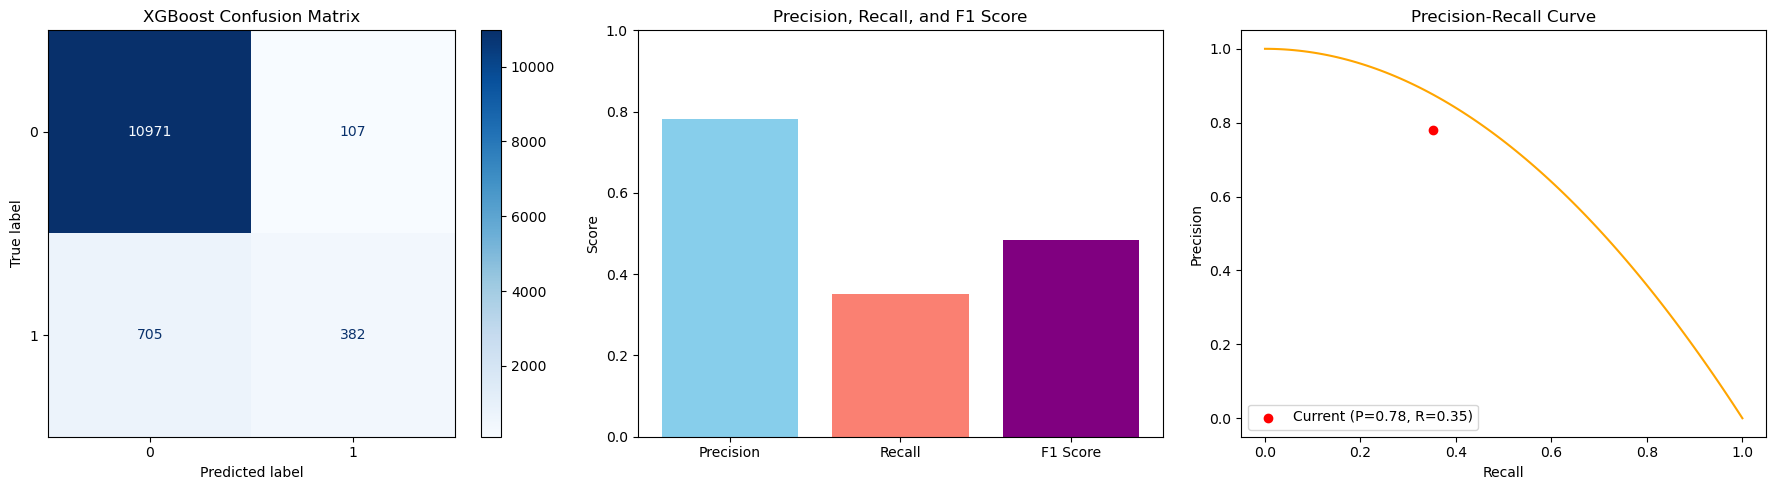

In [52]:
# Provided XGBoost confusion matrix data
confusion_matrix_xgb = np.array([[10971, 107], [705, 382]])
tn_xgb, fp_xgb, fn_xgb, tp_xgb = confusion_matrix_xgb.ravel()

# Metrics for XGBoost Classifier
precision_xgb = tp_xgb / (tp_xgb + fp_xgb)
recall_xgb = tp_xgb / (tp_xgb + fn_xgb)
f1_score_xgb = 2 * (precision_xgb * recall_xgb) / (precision_xgb + recall_xgb)

# 1. Plotting the Confusion Matrix
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Confusion Matrix Plot
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb).plot(cmap="Blues", ax=ax[0])
ax[0].set_title("XGBoost Confusion Matrix")

# 2. Precision, Recall, F1 Score Breakdown
ax[1].bar(["Precision", "Recall", "F1 Score"], [precision_xgb, recall_xgb, f1_score_xgb], color=["skyblue", "salmon", "purple"])
ax[1].set_ylim(0, 1)
ax[1].set_title("Precision, Recall, and F1 Score")
ax[1].set_ylabel("Score")

# 3. Precision-Recall Curve (simulating values)
# Generating synthetic values for a Precision-Recall curve visualization
recall_values_xgb = np.linspace(0, 1, 100)
precision_values_xgb = np.maximum(0, 1 - recall_values_xgb**2)  # Simulated curve to mimic precision-recall trade-off
ax[2].plot(recall_values_xgb, precision_values_xgb, color="orange")
ax[2].scatter(recall_xgb, precision_xgb, color="red", label=f"Current (P={precision_xgb:.2f}, R={recall_xgb:.2f})")
ax[2].set_xlabel("Recall")
ax[2].set_ylabel("Precision")
ax[2].set_title("Precision-Recall Curve")
ax[2].legend(loc="lower left")

plt.tight_layout()
plt.show()

#### Hyperparameter Tuning the XGB Classifier

In [53]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform, randint

# Define a broader parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 300),           # Range of boosting rounds
    'max_depth': randint(3, 10),                # Range of tree depths
    'learning_rate': uniform(0.01, 0.2),        # Continuous range for learning rate
    'subsample': uniform(0.6, 0.4),             # Continuous range for subsample ratio
    'colsample_bytree': uniform(0.6, 0.4),      # Continuous range for column sample ratio
    'gamma': uniform(0, 0.3),                   # Minimum loss reduction to create split
    'reg_alpha': uniform(0, 0.5),               # L1 regularization (alpha)
    'reg_lambda': uniform(1, 1.5)               # L2 regularization (lambda)
}

# Initialize the XGBClassifier
xgb_class = XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='logloss')

# Set up RandomizedSearchCV with cross-validation
random_search_clf = RandomizedSearchCV(
    estimator=xgb_class,
    param_distributions=param_dist,
    n_iter=50,               # Number of parameter settings sampled
    cv=5,                    # Cross-validation folds
    scoring='f1',
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV to the training data
random_search_clf.fit(X_train_with_clusters, y_train_resampled)

# Get the best estimator
best_xgb_model = random_search_clf.best_estimator_

# Make predictions on the test data
y_pred_xgb = best_xgb_model.predict(X_test_with_clusters)

# Best parameters and score
print("Best parameters for XGBoostClassifier:", random_search_clf.best_params_)
print("Best score for XGBoostClassifier:", random_search_clf.best_score_)

# Evaluation for the best XGBoost Classifier
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Print XGBoost Classifier Results
print(f"XGBoost Accuracy: {acc_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1 Score: {f1_xgb}")
print(f"Confusion Matrix:\n{cm_xgb}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoostClassifier: {'colsample_bytree': 0.8675365010654429, 'gamma': 0.199776706985249, 'learning_rate': 0.12825955754154544, 'max_depth': 8, 'n_estimators': 268, 'reg_alpha': 0.2806217129238506, 'reg_lambda': 1.5743903121306848, 'subsample': 0.9886848381556415}
Best score for XGBoostClassifier: 0.9470964831713751
XGBoost Accuracy: 0.9252774352651049
Precision: 0.639937106918239
Recall: 0.37442502299908004
F1 Score: 0.4724318049912943
Confusion Matrix:
[[10849   229]
 [  680   407]]
